In [1280]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np

In [1281]:
import pandas as pd

# Specify the encoding parameter when reading the CSV file
vs_group_initial = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/vs_group/Sample-Superstore.csv', encoding='latin-1')



In [1282]:
vs_group_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [1283]:
vs_group_initial.shape

(9994, 21)

In [1284]:
vs_group_initial.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Renaming Columns

In [1285]:
vs_group_initial.rename(columns= { 'Row ID' : 'RowID'}, inplace=True)
vs_group_initial.rename(columns= { 'Order ID' : 'OrderID'}, inplace=True)
vs_group_initial.rename(columns= { 'Order Date' : 'OrderDate'}, inplace=True)
vs_group_initial.rename(columns= { 'Ship Date' : 'ShipDate'}, inplace=True)
vs_group_initial.rename(columns= { 'Ship Mode' : 'ShipMode'}, inplace=True)
vs_group_initial.rename(columns= { 'Customer ID' : 'CustomerID'}, inplace=True)
vs_group_initial.rename(columns= { 'Customer Name' : 'CustomerName'}, inplace=True)
vs_group_initial.rename(columns= { 'Ship Date' : 'ShipDate'}, inplace=True)
vs_group_initial.rename(columns= { 'Ship Mode' : 'ShipMode'}, inplace=True)
vs_group_initial.rename(columns= { 'Postal Code' : 'PostalCode'}, inplace=True)
vs_group_initial.rename(columns= { 'Product ID' : 'ProductID'}, inplace=True)
vs_group_initial.rename(columns= { 'Sub-Category' : 'SubCategory'}, inplace=True)
vs_group_initial.rename(columns= { 'Product Name' : 'ProductName'}, inplace=True)

## Add Column ProductPrice

In [1286]:
vs_group_initial['AdjustedTotalSales'] = (vs_group_initial['Sales'] / (1 - (vs_group_initial['Discount'] / 100))) + vs_group_initial['Profit']
vs_group_initial['ProductPrice'] = vs_group_initial['AdjustedTotalSales'] / vs_group_initial['Quantity']

In [1287]:
import pandas as pd

# Assuming vs_group_initial is your DataFrame
# Load your dataset into vs_group_initial DataFrame

# Assuming ProductID and ProductName are the column names
# Check for rows with the same ProductID but different ProductName
discrepancies = vs_group_initial.groupby('ProductID')['ProductName'].nunique().reset_index(name='Unique_ProductNames')
discrepancies = discrepancies[discrepancies['Unique_ProductNames'] > 1]

# Group the rows with discrepancies by ProductID
grouped_discrepancies = vs_group_initial[vs_group_initial['ProductID'].isin(discrepancies['ProductID'])].groupby('ProductID')

# Print the 'ProductID' and 'ProductName' columns for each group
for product_id, group in grouped_discrepancies:
    print(f"ProductID: {product_id}")
    print(group[['ProductID', 'ProductName']])
    print("\n")


ProductID: FUR-BO-10002213
            ProductID                                       ProductName
2115  FUR-BO-10002213             DMI Eclipse Executive Suite Bookcases
2471  FUR-BO-10002213  Sauder Forest Hills Library, Woodland Oak Finish
2808  FUR-BO-10002213  Sauder Forest Hills Library, Woodland Oak Finish
5079  FUR-BO-10002213  Sauder Forest Hills Library, Woodland Oak Finish
5918  FUR-BO-10002213             DMI Eclipse Executive Suite Bookcases
6535  FUR-BO-10002213             DMI Eclipse Executive Suite Bookcases
8712  FUR-BO-10002213  Sauder Forest Hills Library, Woodland Oak Finish
9395  FUR-BO-10002213             DMI Eclipse Executive Suite Bookcases
9583  FUR-BO-10002213             DMI Eclipse Executive Suite Bookcases
9649  FUR-BO-10002213             DMI Eclipse Executive Suite Bookcases


ProductID: FUR-CH-10001146
            ProductID                                  ProductName
66    FUR-CH-10001146  Global Value Mid-Back Manager's Chair, Gray
128   FUR-CH-10001

In [1288]:
import pandas as pd

# Assuming vs_group_initial is your DataFrame
# Load your dataset into vs_group_initial DataFrame

# Create a mapping of ProductID to ProductName using the first occurrence
mapping = vs_group_initial.groupby('ProductID')['ProductName'].first().reset_index()

# Merge the mapping with the original dataset to apply the correct ProductName
vs_group_initial_mapped = pd.merge(vs_group_initial, mapping, on='ProductID', suffixes=('_original', '_mapped'))

# Replace the original ProductName with the mapped ProductName
vs_group_initial_mapped['ProductName'] = vs_group_initial_mapped['ProductName_mapped']

# Drop the mapped ProductName column as it's no longer needed
vs_group_initial_mapped.drop('ProductName_mapped', axis=1, inplace=True)

# Check for discrepancies between original and mapped ProductNames
discrepancies = vs_group_initial_mapped[vs_group_initial_mapped['ProductName_original'] != vs_group_initial_mapped['ProductName']]

# Print the discrepancies, if any
if not discrepancies.empty:
    print("Discrepancies found:")
    print(discrepancies[['ProductID', 'ProductName_original', 'ProductName']])
else:
    print("No discrepancies found.")



Discrepancies found:
            ProductID                               ProductName_original  \
183   FUR-FU-10004848                              DAX Solid Wood Frames   
185   FUR-FU-10004848                              DAX Solid Wood Frames   
189   FUR-FU-10004848                              DAX Solid Wood Frames   
419   FUR-CH-10001146                           Global Task Chair, Black   
425   FUR-CH-10001146                           Global Task Chair, Black   
...               ...                                                ...   
8121  TEC-AC-10002550  Memorex 25GB 6X Branded Blu-Ray Recordable Dis...   
8123  TEC-AC-10002550  Memorex 25GB 6X Branded Blu-Ray Recordable Dis...   
8126  TEC-AC-10002550  Memorex 25GB 6X Branded Blu-Ray Recordable Dis...   
9442  OFF-PA-10003022  Standard Line While You Were Out Hardbound T...   
9446  OFF-PA-10003022  Standard Line While You Were Out Hardbound T...   

                                            ProductName  
183   Ho

In [1289]:
row_2115 = vs_group_initial.iloc[2115]  # Rows are zero-indexed, so row 3522 is at index 3521

print(row_2115)

RowID                                                  2116
OrderID                                      CA-2015-164882
OrderDate                                        10/31/2015
ShipDate                                         10/31/2015
ShipMode                                           Same Day
CustomerID                                         SG-20080
CustomerName                                 Sandra Glassco
Segment                                            Consumer
Country                                       United States
City                                               Redlands
State                                            California
PostalCode                                            92374
Region                                                 West
ProductID                                   FUR-BO-10002213
Category                                          Furniture
SubCategory                                       Bookcases
ProductName           DMI Eclipse Execut

In [1290]:
row_2471 = vs_group_initial.iloc[2471]  # Rows are zero-indexed, so row 3522 is at index 3521

print(row_2471)

RowID                                                             2472
OrderID                                                 US-2016-135923
OrderDate                                                    1/22/2016
ShipDate                                                     1/28/2016
ShipMode                                                Standard Class
CustomerID                                                    CM-11935
CustomerName                                             Carlos Meador
Segment                                                       Consumer
Country                                                  United States
City                                                      Fayetteville
State                                                   North Carolina
PostalCode                                                       28314
Region                                                           South
ProductID                                              FUR-BO-10002213
Catego

## Add Column SupplierPrice

In [1291]:
vs_group_initial['SupplierPrice'] = ((vs_group_initial['Sales'] - vs_group_initial['Profit'] + vs_group_initial['Discount']) / (vs_group_initial['Quantity'] * (1 - vs_group_initial['Discount'])))

## Add Column BillingID

In [1292]:
vs_group_initial['BillingID'] = 'B' + vs_group_initial['RowID'].astype(str)


## Add Column AddressID

In [1293]:
vs_group_initial['AddressID'] = 'AD' + (vs_group_initial.groupby(['CustomerID', 'Country', 'City', 'State', 'PostalCode', 'Region']).ngroup() + 1).astype(str)

## Add Column ShipmentID

In [1294]:
vs_group_initial['ShipmentID'] = 'SH' + (vs_group_initial.groupby(['CustomerID', 'ShipDate', 'OrderID']).ngroup() + 1).astype(str)

In [1295]:
vs_group_initial.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Sales,Quantity,Discount,Profit,AdjustedTotalSales,ProductPrice,SupplierPrice,BillingID,AddressID,ShipmentID
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,303.873600,151.936800,110.023200,B1,AD860,SH877
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,951.522000,317.174000,170.786000,B2,AD860,SH877
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,21.491400,10.745700,3.874300,B3,AD1437,SH1468
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,578.875077,115.775015,487.657636,B4,AD4367,SH4461
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,24.929226,12.464613,12.532250,B5,AD4367,SH4461


In [1296]:
vs_group_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowID               9994 non-null   int64  
 1   OrderID             9994 non-null   object 
 2   OrderDate           9994 non-null   object 
 3   ShipDate            9994 non-null   object 
 4   ShipMode            9994 non-null   object 
 5   CustomerID          9994 non-null   object 
 6   CustomerName        9994 non-null   object 
 7   Segment             9994 non-null   object 
 8   Country             9994 non-null   object 
 9   City                9994 non-null   object 
 10  State               9994 non-null   object 
 11  PostalCode          9994 non-null   int64  
 12  Region              9994 non-null   object 
 13  ProductID           9994 non-null   object 
 14  Category            9994 non-null   object 
 15  SubCategory         9994 non-null   object 
 16  Produc

In [1297]:
vs_group_initial = pd.DataFrame(vs_group_initial)  # Replace ... with your actual DataFrame

# Use .info() with iloc to display information about columns 20 to 24
print(vs_group_initial.iloc[:, 20:25].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Profit              9994 non-null   float64
 1   AdjustedTotalSales  9994 non-null   float64
 2   ProductPrice        9994 non-null   float64
 3   SupplierPrice       9994 non-null   float64
 4   BillingID           9994 non-null   object 
dtypes: float64(4), object(1)
memory usage: 390.5+ KB
None


## ShipDate and OrderDate to DATATIME

In [1298]:
vs_group_initial["ShipDate"] = pd.to_datetime(vs_group_initial["ShipDate"])

In [1299]:
vs_group_initial["OrderDate"] = pd.to_datetime(vs_group_initial["OrderDate"])

In [1300]:
vs_group_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   RowID               9994 non-null   int64         
 1   OrderID             9994 non-null   object        
 2   OrderDate           9994 non-null   datetime64[ns]
 3   ShipDate            9994 non-null   datetime64[ns]
 4   ShipMode            9994 non-null   object        
 5   CustomerID          9994 non-null   object        
 6   CustomerName        9994 non-null   object        
 7   Segment             9994 non-null   object        
 8   Country             9994 non-null   object        
 9   City                9994 non-null   object        
 10  State               9994 non-null   object        
 11  PostalCode          9994 non-null   int64         
 12  Region              9994 non-null   object        
 13  ProductID           9994 non-null   object      

In [1301]:
product_sales = vs_group_initial.groupby('ProductName')['Quantity'].sum()

most_sold_products = product_sales.sort_values(ascending=False)

print("Top 10 Most Sold Products:")
print(most_sold_products.head(10))

Top 10 Most Sold Products:
ProductName
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64


In [1302]:
missing_values = vs_group_initial.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
RowID                 0
OrderID               0
OrderDate             0
ShipDate              0
ShipMode              0
CustomerID            0
CustomerName          0
Segment               0
Country               0
City                  0
State                 0
PostalCode            0
Region                0
ProductID             0
Category              0
SubCategory           0
ProductName           0
Sales                 0
Quantity              0
Discount              0
Profit                0
AdjustedTotalSales    0
ProductPrice          0
SupplierPrice         0
BillingID             0
AddressID             0
ShipmentID            0
dtype: int64


In [1303]:
summary_stats = vs_group_initial.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             RowID                      OrderDate  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                            ShipDate    PostalCode         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%             

AttributeError: module 'matplotlib' has no attribute 'suptitle'

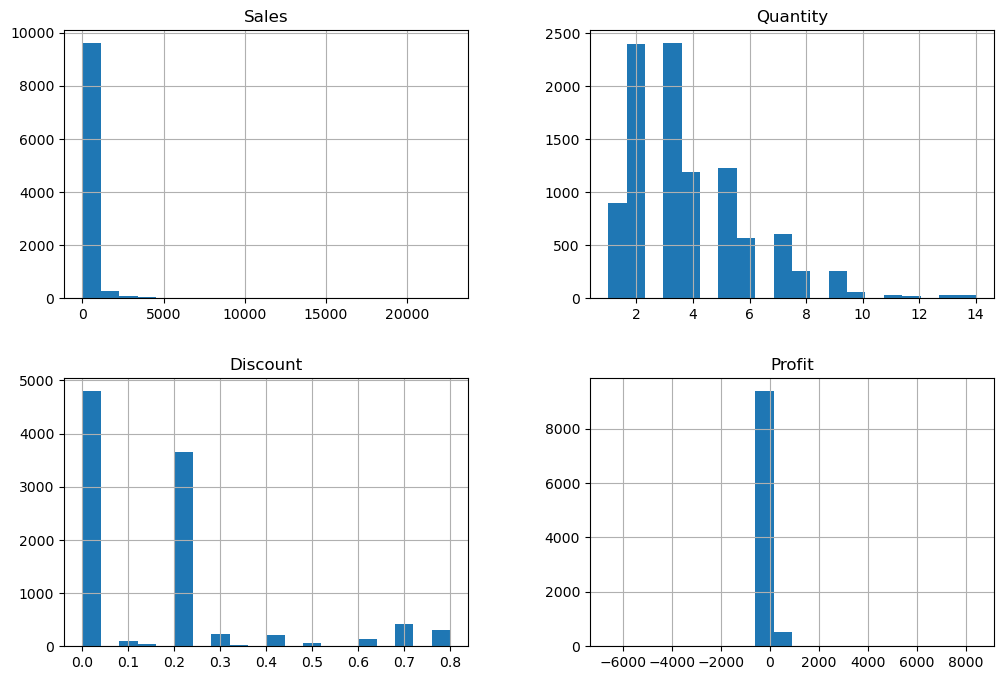

In [1304]:


numerical_vars = ['Sales', 'Quantity', 'Discount', 'Profit']
vs_group_initial[numerical_vars].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numerical Variables")
plt.show()


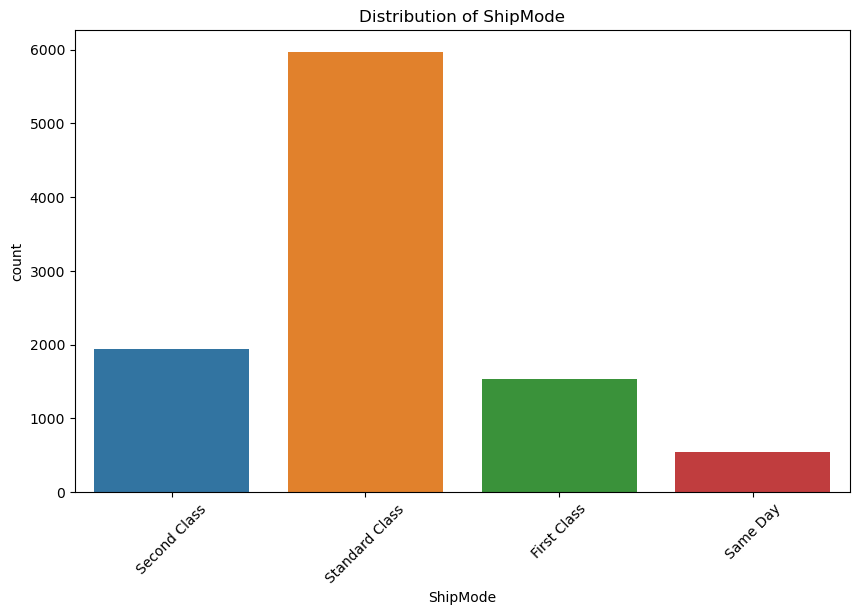

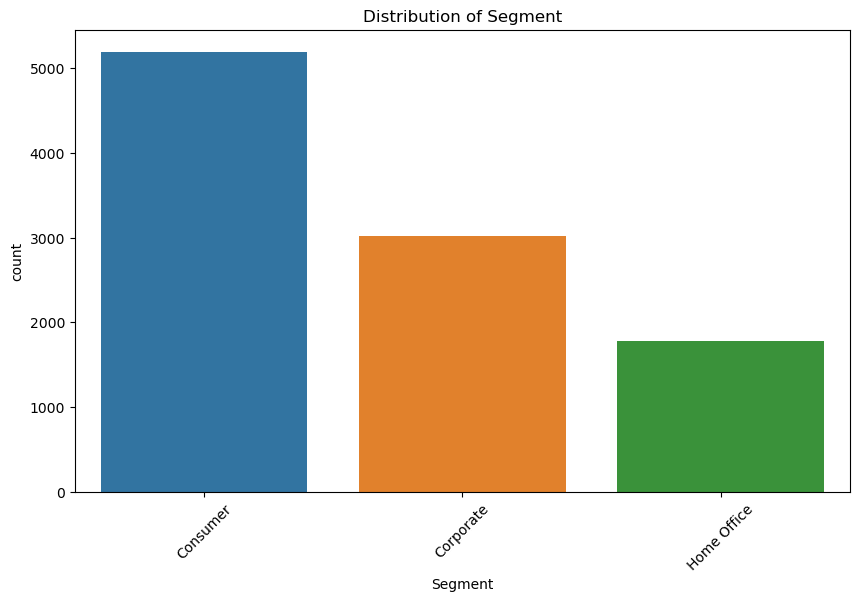

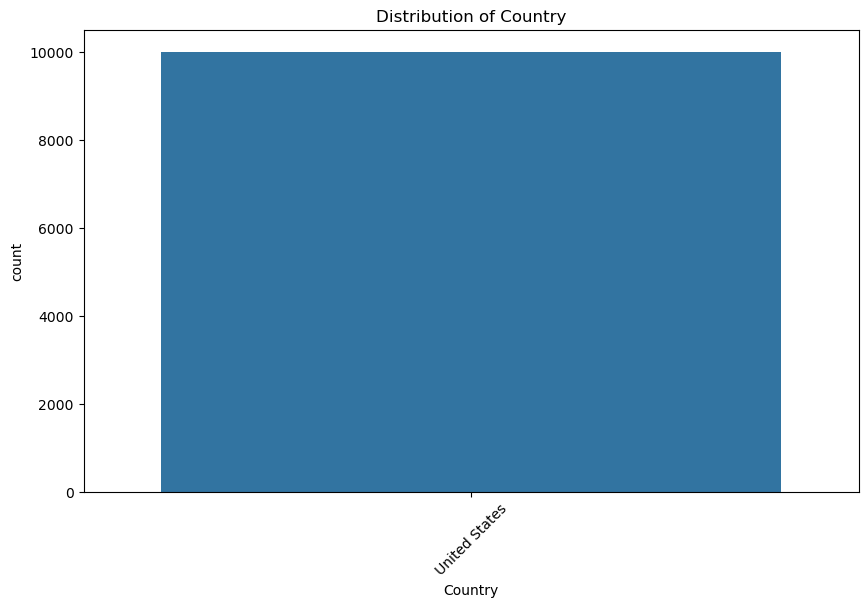

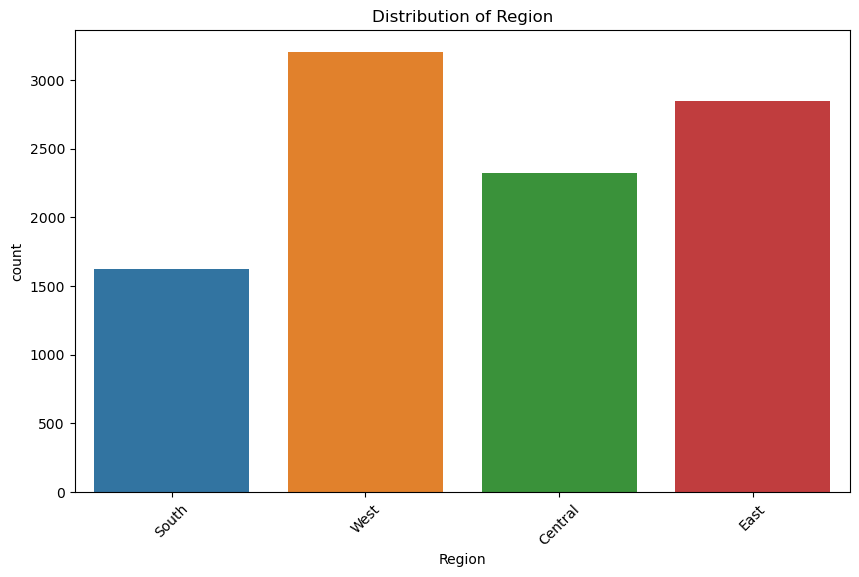

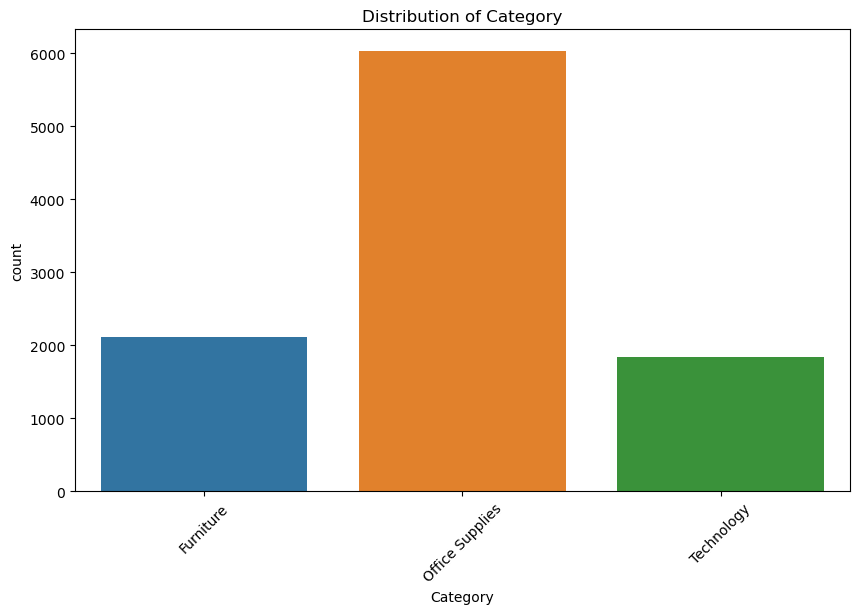

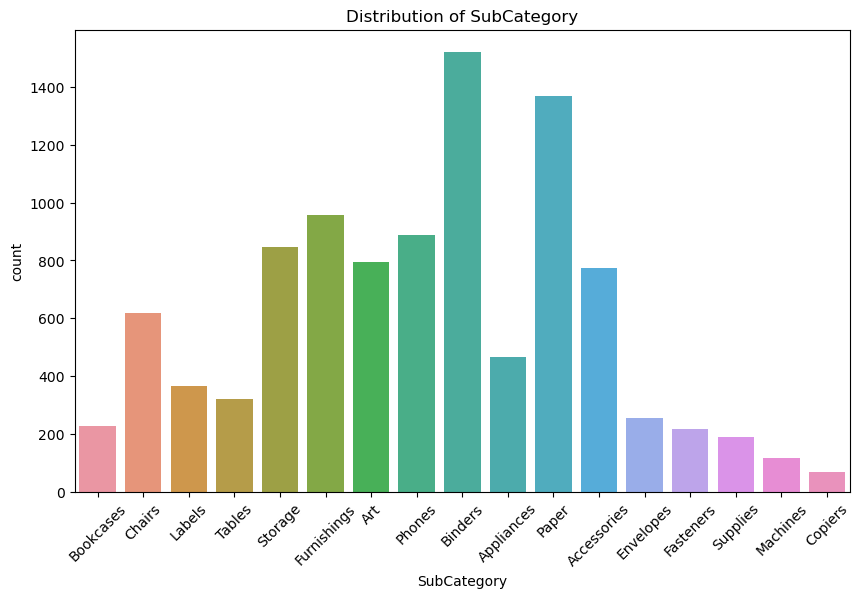

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['ShipMode', 'Segment', 'Country', 'Region', 'Category', 'SubCategory']

for var_name in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=vs_group_initial, x=var_name)
    plt.title(f"Distribution of {var_name}")
    plt.xticks(rotation=45)
    plt.show()


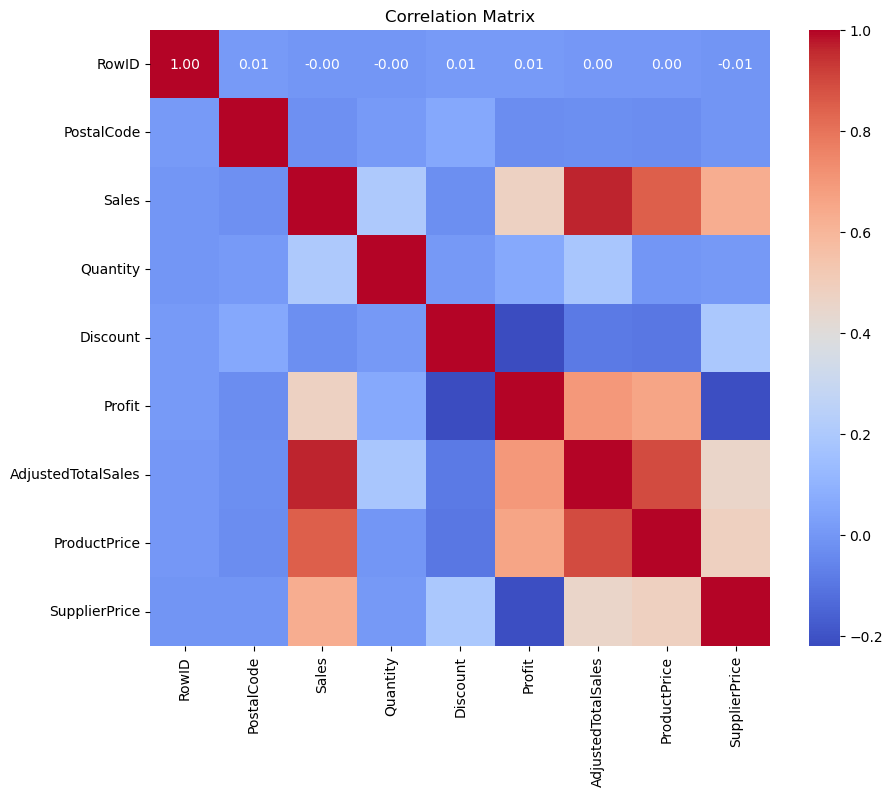

In [ ]:


numeric_columns = vs_group_initial.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = vs_group_initial[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
def remove_non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)

# Apply remove_non_ascii function to all columns in the DataFrame while preserving original data types
def clean_dataframe(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].apply(lambda x: remove_non_ascii(str(x)))
    return df

# Apply the clean_dataframe function
vs_group_initial = clean_dataframe(vs_group_initial)

In [ ]:
vs_group_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   RowID               9994 non-null   int64         
 1   OrderID             9994 non-null   object        
 2   OrderDate           9994 non-null   datetime64[ns]
 3   ShipDate            9994 non-null   datetime64[ns]
 4   ShipMode            9994 non-null   object        
 5   CustomerID          9994 non-null   object        
 6   CustomerName        9994 non-null   object        
 7   Segment             9994 non-null   object        
 8   Country             9994 non-null   object        
 9   City                9994 non-null   object        
 10  State               9994 non-null   object        
 11  PostalCode          9994 non-null   int64         
 12  Region              9994 non-null   object        
 13  ProductID           9994 non-null   object      

## Print a few Rows

In [ ]:

#vs_group_modified = "vs_group_modified_first_15_rows.csv"
#vs_group_initial.head(15).to_csv(vs_group_modified, index=False, encoding='latin-1')

#print("First 15 rows of modified dataset exported to:", vs_group_modified)


## Locate Specific row

In [ ]:
row_12 = vs_group_initial.iloc[11]  # Rows are zero-indexed, so row 3522 is at index 3521

print(row_12)

RowID                                                          12
OrderID                                            CA-2014-115812
OrderDate                                     2014-06-09 00:00:00
ShipDate                                      2014-06-14 00:00:00
ShipMode                                           Standard Class
CustomerID                                               BH-11710
CustomerName                                      Brosina Hoffman
Segment                                                  Consumer
Country                                             United States
City                                                  Los Angeles
State                                                  California
PostalCode                                                  90032
Region                                                       West
ProductID                                         TEC-PH-10002033
Category                                               Technology
SubCategor

## Number of different CustomerID

In [ ]:
# Assuming vs_group_initial is your DataFrame

# Count the number of unique values in the "CustomerID" column
customer_id_counts = vs_group_initial['CustomerID'].value_counts()

# Print the number of unique values
print("Number of rows with different values in 'CustomerID' column:", len(customer_id_counts))


Number of rows with different values in 'CustomerID' column: 793


## Number of different ProductID

In [ ]:
product_id_counts = vs_group_initial['ProductID'].value_counts()


print("Number of rows with different values in 'ProductID' column:", len(product_id_counts))

Number of rows with different values in 'ProductID' column: 1862


Import ProductID 1858

## Number of different AddressID

In [ ]:

num_unique_address_ids = vs_group_initial['AddressID'].nunique()

print("Number of different Address IDs:", num_unique_address_ids)

#4117 

Number of different Address IDs: 4910


## Number of different OrderID

In [ ]:

num_unique_order_ids = vs_group_initial['OrderID'].nunique()

print("Number of different OrderIDs:", num_unique_address_ids)

Number of different OrderIDs: 4910


## Number of different ShipmentID

In [ ]:

num_unique_shipment_ids = vs_group_initial['ShipmentID'].nunique()

print("Number of different ShipmentIDs:", num_unique_shipment_ids)

Number of different ShipmentIDs: 5009


## Number of different BillingID

In [ ]:

num_unique_billing_ids = vs_group_initial['BillingID'].nunique()

print("Number of different BillingIDs:", num_unique_billing_ids)

Number of different BillingIDs: 9994


## Customers with multiple addresses

In [ ]:
# Grouping the DataFrame by 'CustomerID' and counting the number of unique 'AddressID's for each customer
customer_address_count = vs_group_initial.groupby('CustomerID')['AddressID'].nunique()

# Filtering out customers with more than one unique address
customers_with_multiple_addresses = customer_address_count[customer_address_count > 1]

# Checking if any customers have multiple addresses
if not customers_with_multiple_addresses.empty:
    print("Customers with multiple addresses:")
    print(customers_with_multiple_addresses)
else:
    print("No customers have multiple addresses.")


Customers with multiple addresses:
CustomerID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: AddressID, Length: 780, dtype: int64


## Match Order with Shipment?

In [ ]:
# Grouping the DataFrame by 'OrderID' and checking if the 'ShipDate' is consistent within each group
order_shipdate_consistency = vs_group_initial.groupby('OrderID')['ShipDate'].apply(lambda x: x.nunique() == 1)

# Finding the inconsistent 'OrderID's
inconsistent_order_ids = order_shipdate_consistency[~order_shipdate_consistency].index

# Checking if there are any inconsistent 'OrderID's
if inconsistent_order_ids.empty:
    print("All OrderIDs have consistent ShipDates.")
else:
    print("Inconsistent OrderIDs:")
    print(inconsistent_order_ids)


All OrderIDs have consistent ShipDates.


## Database Address

In [ ]:
# Create a new DataFrame with selected columns
df_address = vs_group_initial[['AddressID', 'CustomerID', 'Country', 'City', 'Region', 'State', 'PostalCode']]

# Export the DataFrame to a CSV file
df_address.to_csv('df_address.csv', index=False)


## Database Order

In [ ]:
df_order = vs_group_initial[['OrderID', 'CustomerID', 'OrderDate', 'ProductID']]

# Export the DataFrame to a CSV file
df_order.to_csv('df_order.csv', index=False)

## Export CSV

In [ ]:
# Export the modified dataset to a new CSV file
vs_group_modified = "vs_group_modified.csv"
vs_group_initial.to_csv(vs_group_modified, index=False, encoding='latin-1')

print("Modified dataset exported to:", vs_group_modified)

Modified dataset exported to: vs_group_modified.csv
